In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, train_test_split
import warnings
warnings.filterwarnings('ignore')

In [64]:
def print_results(model):
    print("accuracy", accuracy_score(y_test, model.predict(X_test)))
    print("precision", precision_score(y_test, model.predict(X_test)))
    print("recall", recall_score(y_test, model.predict(X_test)))
    print("confusion matrix", confusion_matrix(y_test, model.predict(X_test)))
    print(classification_report(y_test, model.predict(X_test)))
    
def preprocess(data):
    matrix = pd.DataFrame.as_matrix(train)
    X = matrix[:, 1:-1]
    y = matrix[:, -1:].astype(np.int)
    return X, y

import csv

def write_submission(predicted):
    results = []
    for i, t_predicted in enumerate(predicted):
        results.append((int(test_matrix[i][0]), t_predicted))
    
    with open('test_submission.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(["ID", "TARGET"])
        writer.writerows(results)

In [22]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head() 

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39205.170000,0
1,3,2,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49278.030000,0
2,4,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,67333.770000,0
3,8,2,37,0,195,195,0,0,0,0,...,0,0,0,0,0,0,0,0,64007.970000,0
4,10,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0


In [23]:
X, y = preprocess(train)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

### Decision Tree

In [84]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [85]:
print_results(dt)

accuracy 0.92701399131
precision 0.120938628159
recall 0.135216952573
confusion matrix [[23122   974]
 [  857   134]]
             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96     24096
        1.0       0.12      0.14      0.13       991

avg / total       0.93      0.93      0.93     25087



In [88]:
dt = DecisionTreeClassifier(class_weight={0:100})
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 100}, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [89]:
print_results(dt)

accuracy 0.927372742855
precision 0.132625994695
recall 0.151362260343
confusion matrix [[23115   981]
 [  841   150]]
             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96     24096
        1.0       0.13      0.15      0.14       991

avg / total       0.93      0.93      0.93     25087



### Bernouilli Naïve Bayes

In [70]:
nb = BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [71]:
print_results(nb)

accuracy 0.721768246502
precision 0.0846164516577
recall 0.615539858729
confusion matrix [[17497  6599]
 [  381   610]]
             precision    recall  f1-score   support

          0       0.98      0.73      0.83     24096
          1       0.08      0.62      0.15       991

avg / total       0.94      0.72      0.81     25087



In [72]:
nb = BernoulliNB(class_prior=[0.001, 0.999])
nb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=[0.001, 0.999],
      fit_prior=True)

In [73]:
print_results(nb)

accuracy 0.668593295332
precision 0.0760680791942
recall 0.662966700303
confusion matrix [[16116  7980]
 [  334   657]]
             precision    recall  f1-score   support

        0.0       0.98      0.67      0.79     24096
        1.0       0.08      0.66      0.14       991

avg / total       0.94      0.67      0.77     25087



### SVM

In [ ]:
sv = SVC()
sv.fit(X_train, y_train)

In [ ]:
print_results(sv)

In [ ]:
sv = SVC(class_weight={0:100})
sv.fit(X_train, y_train)

In [ ]:
print_results(sv)

### Random Forests

In [51]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
print_results(rf)

accuracy 0.954119663571
precision 0.161016949153
recall 0.0383451059536
confusion matrix [[23898   198]
 [  953    38]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.98     24096
          1       0.16      0.04      0.06       991

avg / total       0.93      0.95      0.94     25087



In [12]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
print_results(rf)

accuracy 0.999402080759
precision 1.0
recall 0.984863773966
confusion matrix [[24096     0]
 [   15   976]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     24096
          1       1.00      0.98      0.99       991

avg / total       1.00      1.00      1.00     25087



In [8]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
print_results(rf)

accuracy 0.9577470403
precision 0.2
recall 0.0232088799193
confusion matrix [[24004    92]
 [  968    23]]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98     24096
          1       0.20      0.02      0.04       991

avg / total       0.93      0.96      0.94     25087



In [52]:
test_matrix = pd.DataFrame.as_matrix(test)
test_X = test_matrix[:, 1:]

In [59]:
predicted = rf.predict(test_X)

In [65]:
write_submission(predicted)

### ROC Curve

In [66]:
from sklearn.metrics import roc_curve, auc

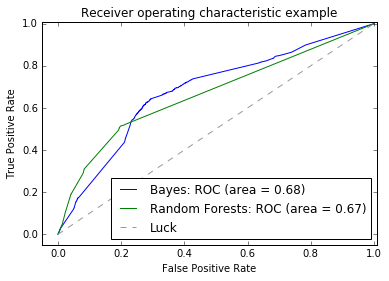

In [75]:
models = [nb, rf]
titles = ["Bayes", "Random Forests"]

for model, title in zip(models, titles):
    probas_ = model.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='%s: ROC (area = %0.2f)' % (title, roc_auc))
    
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

plt.xlim([-0.05, 1.01])
plt.ylim([-0.05, 1.01])
plt.xlabel('False Positive Rate (Recall)')
plt.ylabel('True Positive Rate (1-Precision)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()